In [ ]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *

# === 文件路径设置 ===
base_dir0 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
base_dir1 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-3微米'
file_name = 'field0008.sdf'

file_path0 = os.path.join(base_dir0, file_name)
file_path1 = os.path.join(base_dir1, file_name)

# === 加载字段数据 ===
result0 = load_field(file_path0)
result1 = load_field(file_path1)

Ey0 = result0['Ey']
Ez0 = result0['Ez']
Ey1 = result1['Ey']
Ez1 = result1['Ez']

x = result0['x']
y = result0['y']
z = result0['z']

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米/field0009.sdf
t() = time
bx(2500, 350, 350) = bx
by(2500, 350, 350) = by
bz(2500, 350, 350) = bz
ex(2500, 350, 350) = ex
ey(2500, 350, 350) = ey
ez(2500, 350, 350) = ez
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid
Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-1.5微米/field0009.sdf
t() = time
bx(2500, 350, 350) = bx
by(2500, 350, 350) = by
bz(2500, 350, 350) = bz
ex(2500, 350, 350) = ex
ey(2500, 350, 350) = ey
ez(2500, 350, 350) = ez
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid


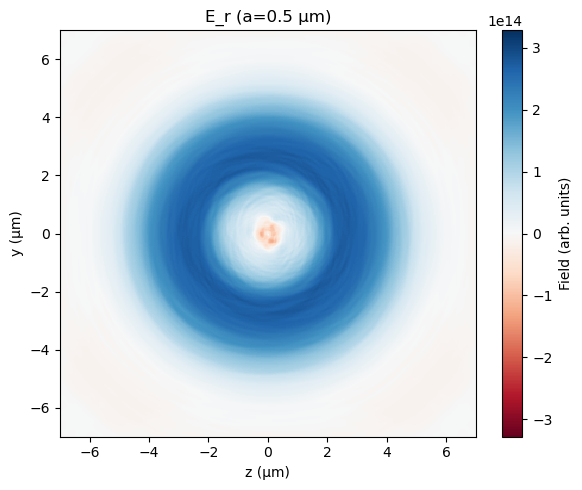

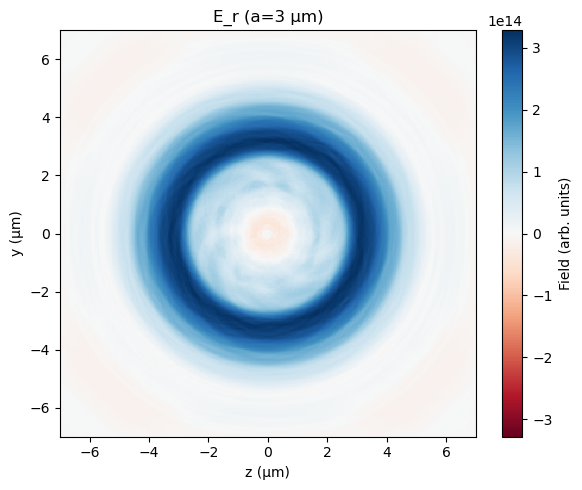

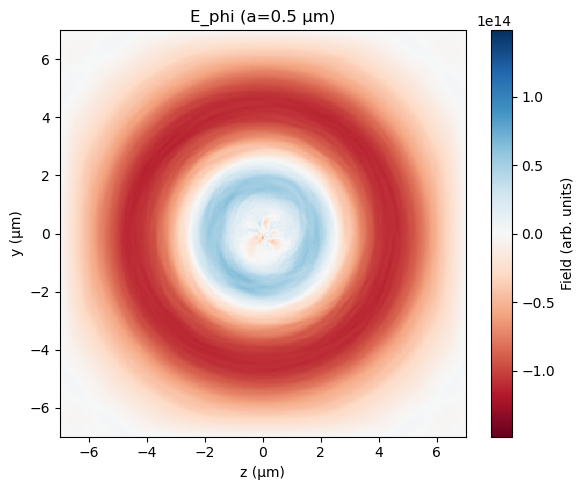

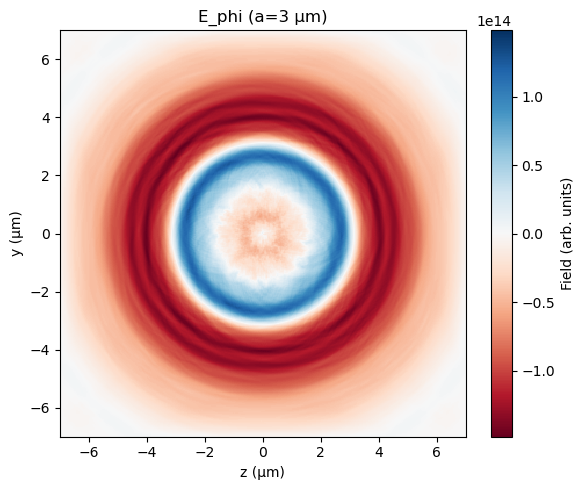

In [ ]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *

# === 文件路径设置 ===
base_dir1 = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-1.5微米'
file_name = 'field0009.sdf'

file_path0 = os.path.join(base_dir0, file_name)
file_path1 = os.path.join(base_dir1, file_name)

# === 加载字段数据 ===
result0 = load_field(file_path0)
result1 = load_field(file_path1)

Ey0 = result0['Ey']
Ez0 = result0['Ez']
Ey1 = result1['Ey']
Ez1 = result1['Ez']
x = result0['x']
y = result0['y']
z = result0['z']

# === 截取 x = 22 μm 平面 ===
x_target = 20.7e-6
x_index = np.argmin(np.abs(x - x_target))
Ey0_slice = Ey0[x_index, :, :]
Ez0_slice = Ez0[x_index, :, :]
Ey1_slice = Ey1[x_index, :, :]
Ez1_slice = Ez1[x_index, :, :]

# === 构建 y-z 网格 & 计算 phi ===
Y, Z = np.meshgrid(y, z, indexing='ij')
phi = np.arctan2(Z, Y)

# === 坐标转换：笛卡尔 -> 柱坐标 ===
def cartesian_to_polar_field(Ey, Ez, phi):
    E_r = Ey * np.cos(phi) + Ez * np.sin(phi)
    E_phi = -Ey * np.sin(phi) + Ez * np.cos(phi)
    return E_r, E_phi

Er0, Ephi0 = cartesian_to_polar_field(Ey0_slice, Ez0_slice, phi)
Er1, Ephi1 = cartesian_to_polar_field(Ey1_slice, Ez1_slice, phi)

# === 绘图函数 ===
def plot_field(field, Y, Z, title, cmap='RdBu', vmin=None, vmax=None):
    plt.figure(figsize=(6, 5))
    im = plt.pcolormesh(Z * 1e6, Y * 1e6, field, shading='auto', cmap=cmap, vmin=vmin, vmax=vmax)
    plt.colorbar(im, label='Field (arb. units)')
    plt.xlabel('z (μm)')
    plt.ylabel('y (μm)')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# === 统一 color scale（可选）===
vmax = max(np.max(np.abs(Er0)), np.max(np.abs(Er1)))
vphi = max(np.max(np.abs(Ephi0)), np.max(np.abs(Ephi1)))

# === 绘制结果 ===
plot_field(Er0, Y, Z, 'E_r (a=0.5 μm)', vmin=-vmax, vmax=vmax)
plot_field(Er1, Y, Z, 'E_r (a=3 μm)', vmin=-vmax, vmax=vmax)
plot_field(Ephi0, Y, Z, 'E_phi (a=0.5 μm)', vmin=-vphi, vmax=vphi)
plot_field(Ephi1, Y, Z, 'E_phi (a=3 μm)', vmin=-vphi, vmax=vphi)


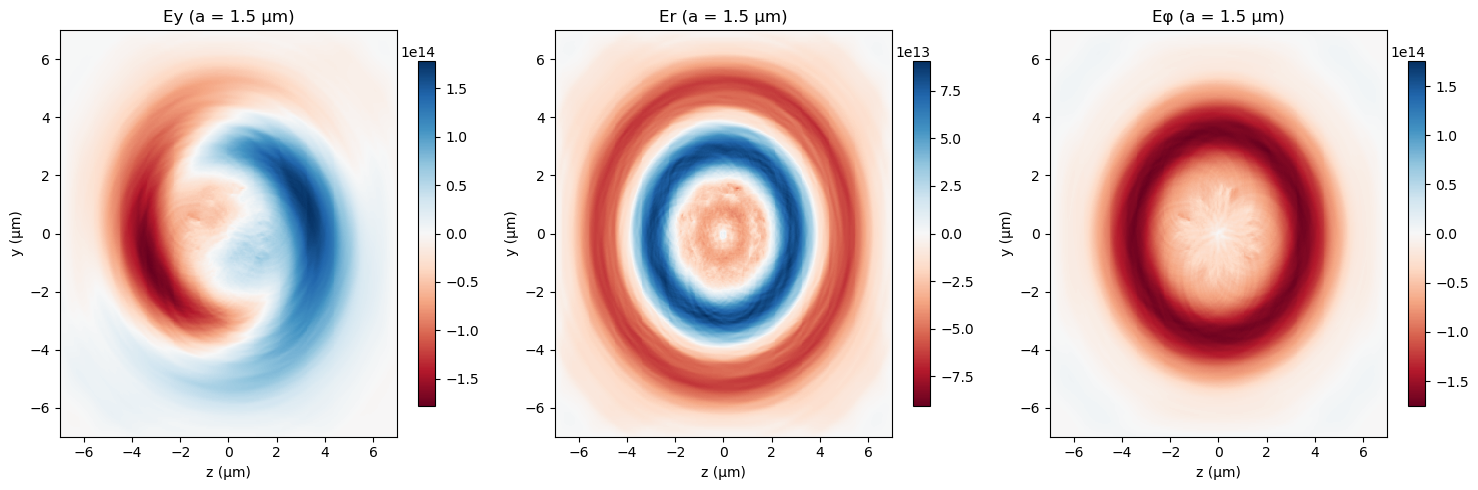

In [32]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *

# === 文件路径设置 ===
base_dir = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-1.5微米'
file_name = 'field0009.sdf'
file_path = os.path.join(base_dir, file_name)

# === 加载字段数据 ===
result = load_field(file_path)
Ey = result['Ey']
Ez = result['Ez']
x = result['x']
y = result['y']
z = result['z']

# === 截取 x = 20.7 μm 平面 ===
x_target = 22.44e-6#22.44e-6
x_index = np.argmin(np.abs(x - x_target))
Ey_slice = Ey[x_index, :, :]
Ez_slice = Ez[x_index, :, :]

# === 构建 y-z 网格 & 计算 phi ===
Y, Z = np.meshgrid(y, z, indexing='ij')
phi = np.arctan2(Z, Y)

# === 笛卡尔 -> 柱坐标 ===
def cartesian_to_polar_field(Ey, Ez, phi):
    E_r = Ey * np.cos(phi) + Ez * np.sin(phi)
    E_phi = -Ey * np.sin(phi) + Ez * np.cos(phi)
    return E_r, E_phi

Er, Ephi = cartesian_to_polar_field(Ey_slice, Ez_slice, phi)

# === 统一颜色范围 ===
vmax_Ey = np.max(np.abs(Ey_slice))
vmax_Er = np.max(np.abs(Er))
vmax_Ephi = np.max(np.abs(Ephi))

# === 创建三联图 ===
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fields = [Ey_slice, Er, Ephi]
titles = ['Ey (a = 1.5 μm)', 'Er (a = 1.5 μm)', 'Eφ (a = 1.5 μm)']
vmaxs = [vmax_Ey, vmax_Er, vmax_Ephi]

for ax, field, title, vmax in zip(axes, fields, titles, vmaxs):
    im = ax.pcolormesh(z * 1e6, y * 1e6, field, shading='auto', cmap='RdBu', vmin=-vmax, vmax=vmax)
    ax.set_title(title)
    ax.set_xlabel('z (μm)')
    ax.set_ylabel('y (μm)')
    fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.85)

plt.tight_layout()
plt.show()
